# Artificial Neural Networks

As we have seen, Perceptrons are only capable of solving *linearly separable* problems.
To overcome this limitation we can connect Perceptrons together into a network, first proposed by Rumelhart. Mclelland & Hinton (1980's).
Each one becomes a *Node* in the network and they are connected together into *Layers*.
In standard Artificial Neural Network (ANN) architecture there is one *input*, one *output* and one or more *hidden* layers.
Though *input* layer is a bit misleading, it doesn't actually do any computation, it is just the inputs to the network.

![ANN](resources/ANN.png "ANN Image")

So outputs of hidden layers become the inputs to subsequent hidden layers, or the output layer if it is the last hidden layer.
Hidden nodes tend to learn different aspects of the problem space,
building more complex decision boundaries and are therefore able to solve more complex problems.
To give you an intuition from the XOR problem we just saw, take a look at the following diagram.
The hidden nodes both learn different logical functions (AND and OR), if you combine these you have solved XOR!

![ANN-XOR](resources/ANN-XOR.png "ANN-XOR Image")

**Note:** The number of nodes in the input layer *must* equal the number of inputs/features in the data.
The number of output nodes *must* equal the number of labels/classes in the data.
The number of hidden layers and nodes in the layers is arbitrary,
and selecting this architecture is part of building an ANN.

### Differences Between Perceptrons and ANN

Before we look at the algorithm for ANN we need to understand two key differences.

#### 1. Activation Function

We need each node to output a *real number*,
so the step function we used before (which outputs 0 or 1) will not work.
Instead we use the Sigmoid function, which 'squashes' the output into a real number between 0 and 1.

**Note:** Other activation functions are also used, such as Tahn and ReLu, but we will stick to Sigmoid.

![Activation-Functions](resources/Activation-Functions.png "Activation-Functions Image")

We need real numbers because:
1. For output nodes, real numbers between 0 and 1 can be considered a *probability* of an input example belonging to a particular class.
2. Hidden layer nodes need to produce *some* output, even if it is very small,
so that we can calculate the error and update weights using Backpropagation.

#### 2. Backpropagation and Gradient Descent

With a Perceptron we only have one layer, so,
from its output we can calculate the error it produces and use that to update the weight values.
But now we have multiple layers what should the hidden nodes output be?
What is the error and how much should we change the weights?

Instead, we *share out the error* from the output nodes to the hidden nodes,
and we do this in *proportion to the strength of the 'signal'* (output) that it produced - hence why we need *some* output.
So we are *propagating* the error from the output nodes back up the network.
This is achieved by calculating the derivative of the error from the previous layer with respect to the weights (derivative of the error function).
We then use a similar weight update function that we did with Perceptrons:

error(derivative of error function) X input X learning rate

Why do we calculate the derivative of the error function? This is an algorithm called **Stochastic Gradient Descent**.
We want to *minimise* the error produced by a weight.
By calculating the derivative we get the *gradient* or the 'steepness' of a curve at that point (weight value).
The larger the gradient the further we are from the minimum error (0 gradient).
Again, the learning rate is how large a step we want to take towards the minimum error.

![Gradient-Descent](resources/Gradient-Descent.png "Gradient-Descent Image")

THE LEARNING RATE IS NEGATIVE?
https://www.kaggle.com/niyipop/2-layer-neural-network-from-scratch-using-numpy
### ANN Algorithm

Similar to Perceptrons, ANN are trained in two 'phases'.
The forward pass, where data is input into the network to produce an output.
The backward pass, where the error in output is used to update the weights using Backpropagation and Gradient Descent.
```
1. Set weights to random values in range [-0.5, 0.5]

2. Set learning rate to a small value, usually less than 0.5

3. For each training example in the dataset i.e one 'epoch'

    Forward Propagation
    
    For each node in the layer and each layer in turn:
        
        A. Sum inputs multiplied by weights
    
        B. Calculate Sigmoid (activation) of the sum
    
    Backpropagation
    
        C. For each node in the layer and each layer in turn **going backwards**:
        
        Calculate the error and derivative, first the output layer then hidden.
        
            output error = expected/desired output - activation
    
            output derivative = output error X derivative of sigmoid for layers output
    
            hidden layer error = output derivative X output weights
        
            hidden layer derivative = hidden layer error X derivative of sigmoid for layers output
        
        D. Update all the weights **at the same time**:
    
        change in weight = layer derivative X input X learning rate
    
4. Repeat from step 3 until error is as small as possible, or (more likely) for the number of training epochs.
```

Or if you prefer maths...

Forward Propagation:

$a = \sigma ( \sum\limits_{i=0}^{n} w_i \times x_i)$

Backpropagation:

$ w^{\prime} = w - \alpha\frac{\partial E}{\partial w}$

### Iris Dataset

The Iris Flower data set contains 150 examples from three species Iris Setosa, Iris Virginica and Iris Versicolor.
There are 50 examples of each species and each example has four measurements (features) Sepal Length, Sepal Width, Petal Length and Petal Width.
The Iris data is often used as an example for machine learning classifiers and we are going to build and test an ANN to classify the data
i.e. given a set of measurements, what is the species?

![Iris-image](resources/Iris-image.png "Iris-image Image")

Real data very rarely comes in a format that is suitable for input to a machine learning algorithm.
So first we need to prepare the data ready for classification.
It is also often useful to visualise the data because this might help us select what kind of classifier is suitable and predict how well they might perform.

   Id  SepalLength  SepalWidth  PetalLength  PetalWidth      Species
0   1          5.1         3.5          1.4         0.2  Iris-setosa
1   2          4.9         3.0          1.4         0.2  Iris-setosa
2   3          4.7         3.2          1.3         0.2  Iris-setosa
3   4          4.6         3.1          1.5         0.2  Iris-setosa
4   5          5.0         3.6          1.4         0.2  Iris-setosa


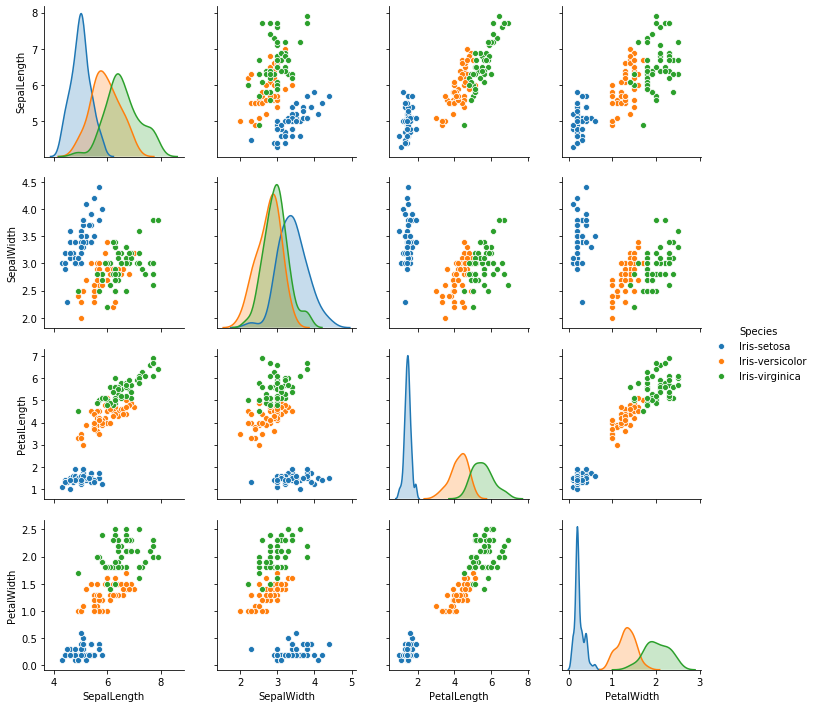

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Read data from csv
iris = pd.read_csv("data/Iris.csv")
print(iris.head())

# Plot the various combinations of 2D graph
g = sns.pairplot(iris.drop("Id", axis=1), hue="Species")

Next we need to replace the species labels with numbers and convert them to numbers.
In this case we are going to use ‘one-hot encoding’,
which means each species label will be replaced with a set of binary values which indicate which of the three species it is
i.e 'Iris-setosa' = 1 0 0, 'Iris-versicolor' = 0 1 0 and 'Iris-virginica' = 0 0 1.

We also need to get all of the features from the relevant columns and split the data into training and test sets.

In [3]:
# Replace the species with 0, 1 or 2 as appropriate
iris['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# Get labels, flatten and encode to one-hot
columns = ['Species']
labels = pd.DataFrame(iris, columns=columns).to_numpy()
labels = labels.flatten()
labels = np.eye(np.max(labels) + 1)[labels]

# Get Features
columns = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
features = pd.DataFrame(iris, columns=columns).to_numpy()

# Split data to training and test data, 2/3 for training and 1/3 for testing
train_x, test_x, train_y, test_y = train_test_split(features, labels, test_size=0.33)

### Build the ANN
First we will define the Sigmoid activation function and its derivative.
Then, as before, we will define a few parameters such as learning rate and number of training epochs.

The main difference between our Perceptron implementation is that we will use matrices to represent our layer weights.
If we had to manually add new variables for each weight/node it would be quite unmanageable.
For example with 4 inputs and 6 hidden nodes (+ 6 bias) = 30 weight variables for just one layer.
Instead we can represent the entire layer as a matrix, in this case the hidden layer will be a 4x6 matrix.
This also allows us to perform the calculations on the entire layer at once, rather than using loops.

The rest of the code is the implementation of the forward and backward passes through the network.
Every 100 epochs we will record the mean squared error and accuracy of predictions.
You should see the error drop and accuracy increase smoothly(ish) over time.

Epoch: 0 Error: 0.10893 Accuracy: 35.0% Test Error: 0.10296 Accuracy: 30.0%
Epoch: 100 Error: 0.05616 Accuracy: 89.0% Test Error: 0.05344 Accuracy: 96.0%
Epoch: 200 Error: 0.03067 Accuracy: 96.0% Test Error: 0.02755 Accuracy: 100.0%
Epoch: 300 Error: 0.02162 Accuracy: 95.0% Test Error: 0.01926 Accuracy: 98.0%
Epoch: 400 Error: 0.01729 Accuracy: 96.0% Test Error: 0.01563 Accuracy: 96.0%
Epoch: 500 Error: 0.01523 Accuracy: 95.0% Test Error: 0.01398 Accuracy: 94.0%
Epoch: 600 Error: 0.01256 Accuracy: 94.0% Test Error: 0.01133 Accuracy: 92.0%
Epoch: 700 Error: 0.00984 Accuracy: 95.0% Test Error: 0.00854 Accuracy: 94.0%
Epoch: 800 Error: 0.00805 Accuracy: 95.0% Test Error: 0.00668 Accuracy: 94.0%
Epoch: 900 Error: 0.00698 Accuracy: 95.0% Test Error: 0.00559 Accuracy: 96.0%
Epoch: 1000 Error: 0.0063 Accuracy: 94.0% Test Error: 0.00494 Accuracy: 96.0%
Epoch: 1100 Error: 0.00575 Accuracy: 94.0% Test Error: 0.00441 Accuracy: 96.0%
Epoch: 1200 Error: 0.0052 Accuracy: 94.0% Test Error: 0.00389 Ac

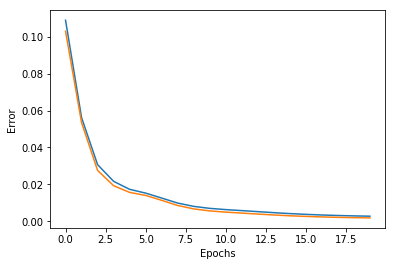

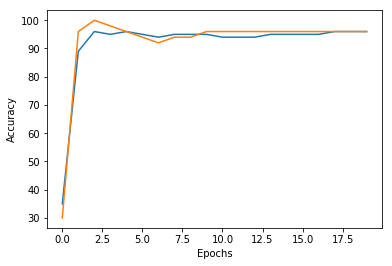

In [42]:
# Sigmoid and its derivative
def sigmoid(x):
    # This is not strictly sigmoid, but more stable when handling matrices
    return .5 * (1 + np.tanh(.5 * x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Learning rate
learning_rate = 0.005

# Number of training epochs
num_epochs = 2000

# Network architecture parameters
num_features = len(train_x[0])
num_classes = len(train_y[0])
num_hidden_nodes = 6

# Initialise weights in the range -1 to 1
np.random.seed(1)
# Hidden layer weights with shape = number of input features x number of hidden nodes
hidden_weights = np.random.uniform(-1, 1, size=(num_features, num_hidden_nodes))
hidden_bias = np.random.uniform(-1, 1, size=(1, num_hidden_nodes))
# Output layer weights with shape = number of hidden nodes x number of output classes
output_weights = np.random.uniform(-1, 1, size=(num_hidden_nodes, num_classes))
output_bias = np.random.uniform(-1, 1, size=(1, num_classes))

# For recording error and accuracy - for graph later
training_errors = []
testing_errors = []
training_accuracies = []
testing_accuracies = []

# Train for number of epochs
for epoch in range(num_epochs):

    # Forward pass
    input_layer = train_x
    # sigmoid( (W * X) + b)
    hidden_layer = sigmoid(np.dot(input_layer, hidden_weights) + hidden_bias)
    output_layer = sigmoid(np.dot(hidden_layer, output_weights) + output_bias)

    # Backpropagation using gradient descent
    # Calculate output layer error
    output_layer_error = train_y - output_layer
    # Calculate output layer derivative Note: that we just need this layers error for the bias
    output_layer_delta = output_layer_error * sigmoid_deriv(output_layer)
    output_bias_delta = np.sum(output_layer_error, axis=0)
    
    # Calculate hidden layer error (from the output layers weights and derivative
    hidden_layer_error = output_layer_delta.dot(output_weights.T)
    # Calculate hidden layer derivative Note: that we just need this layers error for the bias
    hidden_layer_delta = hidden_layer_error * sigmoid_deriv(hidden_layer)
    hidden_bias_delta = np.sum(hidden_layer_error, axis=0)

    # Update the weights (learning rate X layers input X layers derivative)
    output_weights += learning_rate * hidden_layer.T.dot(output_layer_delta)
    output_bias += learning_rate * output_bias_delta
    
    hidden_weights += learning_rate * input_layer.T.dot(hidden_layer_delta)
    hidden_bias += learning_rate * hidden_bias_delta

    # Every 100 epochs record error and accuracy during training
    if (epoch % 100) == 0:
        
        # Mean squared error over all errors this epoch
        error = 0.5 * np.mean(np.abs(output_layer_error)) ** 2
        training_errors.append(error)

        accuracy_count = 0
        for i in range(len(output_layer)):
          
            # Get the prediction i.e. the output with the highest value
            prediction = np.argmax(output_layer[i])
            # Get the actual label
            actual_label = np.argmax(train_y[i])
            
            # If they match the prediction was correct
            if prediction == actual_label:
                accuracy_count += 1
        accuracy = (len(train_x) / 100) * accuracy_count
        training_accuracies.append(accuracy)
        
        ##YOUR CODE STARTS HERE##     
        
        # Forward pass
        test_hidden = sigmoid(np.dot(test_x, hidden_weights) + hidden_bias)
        test_output = sigmoid(np.dot(test_hidden, output_weights) + output_bias)
        test_output_error = test_y - test_output
        # Mean squared error over all errors
        test_error = 0.5 * np.mean(np.abs(test_output_error)) ** 2
        testing_errors.append(test_error)

        test_accuracy_count = 0
        for j in range(len(test_output)):

            # Get the prediction i.e. the output with the highest value
            test_prediction = np.argmax(test_output[j])
            # Get the actual label
            actual_label = np.argmax(test_y[j])

            # If they match the prediction was correct
            if test_prediction == actual_label:
                test_accuracy_count += 1
        test_accuracy = (100 / len(test_x)) * test_accuracy_count
        testing_accuracies.append(test_accuracy)
        
           
        
        print("Epoch: " + str(epoch) +
              " Error: " + str(round(error, 5)) +
              " Accuracy: " + str(accuracy) + "%" +
              " Test Error: " + str(round(test_error, 5)) +
              " Accuracy: " + str(test_accuracy) + "%")
        ##YOUR CODE ENDS HERE##
        # print("Epoch: " + str(epoch) +
        #       " Error: " + str(round(error, 5)) +
        #       " Accuracy: " + str(accuracy) + "%")
        
# Plot the error chart
plt.plot(training_errors)
plt.plot(testing_errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Plot the accuracy chart
plt.plot(training_accuracies)
plt.plot(testing_accuracies)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

### Testing the Network
You should see quite a high accuracy and low error on the training set.
Though in reality this is not a good measure of how well the network will perform
because it has already 'seen' the training data and used that to adjust the weights.
How well would it perform on data that it has not seen? How well will it 'generalise' to new data?

This is why we kept 1/3rd of our data for testing!

Lets apply our learned model to the test set and see how well it is able to classify flowers that it has not seen before.
You can either do this in a new cell below,
or (recommended) add code above in the section where we are measuring error and accuracy every 100 epochs.
That way we can track progress as the network trains.
You can even add the testing errors and accuracies to the plots for comparison.

So you need to:
1. Perform a forward pass **only**, no updating weights, using the test inputs.
2. Calculate the error on the test labels after the forward pass.
3. Calculate the accuracy on the test set.

**Note:** It is recommended that you create new variables for everything **except** the weight/bias matrices.
Those matrices are the model we have trained.

You can also try different learning rates/epochs or anything else to see what effect it has.
